<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h2 style="color: #FF8C00;">Instructions:</h2>

- **Collaboration**: You are working in **pairs**, so collaborate to create a comprehensive `README` file that outlines your project, methodologies, and findings.
- **Presentation**: Prepare and deliver a presentation that summarizes your analysis, demonstrating the depth and breadth of your work.
- **Python scripts**: You can use the this notebook or the `EDA_template` as template for your findings, but you'll have to deliver a different notebook to GitHub.
- **Extended Analysis**: Dive deeper into the data to uncover additional insights. Push the boundaries of your analysis to explore complex interactions within the portfolio.

<h1 style="color: #FF8C00;">Libraries</h1>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Display max columns
pd.set_option('display.max_columns', None)
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

### Different Dataframes created and (repeatedly) used in the analysis:
1. df_asset_price_data [original df of all assets and their values]
2. df_asset_price_data_ffill_na [df of all assets without NaNs]
3. df_asset_growth_rate [df all assets without NaNs, with assets and their respective % growth rate]
4. df_growth_rate [df with only the growth rates of the assets]
5. df_growth_rate_date_index [growth rate and date as index]
6. df_assets [df all assets without NaNs and without date]
7. df_portfolio_weights [original df of all asset WEIGHTS]
8. df_asset_cumulative_returns [df all assets and cumulative returns]
9. df_asset_information_data [df with info on asset type]

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h3 style="color: #FF6347;">Data Loading</h3>

In [8]:
df_asset_price_data = pd.read_csv("asset_price_data.csv")

In [9]:
df_portfolio_weights = pd.read_csv("portfolio_weights.csv")

In [10]:
df_asset_information_data = pd.read_csv("asset_information_data.csv")

In [11]:
df_asset_price_data.head(1)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89


In [12]:
df_asset_price_data.shape

(783, 6)

In [13]:
df_portfolio_weights.head(1)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974


In [14]:
df_portfolio_weights.shape

(783, 6)

In [15]:
df_asset_price_data.describe()

,Asset1,Asset2,Asset3,Asset4,Asset5
count,770.000000,770.000000,770.000000,734.000000,763.000000
mean,248.980188,76.112381,31.473296,327.356880,54.123198
std,6.845006,13.642823,3.304415,13.487611,8.185047
min,229.701200,48.516000,22.895066,272.790000,37.340000
25%,246.868050,64.786250,29.281948,318.765000,49.120000
50%,250.685350,72.003000,30.651198,326.665000,52.720000
75%,253.379275,88.973000,33.757265,340.155000,59.500000
max,259.110000,104.663000,39.115000,345.710000,71.050000


In [16]:
df_asset_price_data.columns = [column.lower().replace(" ", "_") for column in df_asset_price_data.columns]
df_portfolio_weights.columns = [column.lower().replace(" ", "_") for column in df_portfolio_weights.columns]

<h3 style="color: #FF6347;">First Impressions</h3>

- The portfolio consists of five assets, some of different investment types. Asset1 and Asset2 are of type "fixed income", Asset3 and Asset4 of "equity" and Asset5 is an alternative investment.
- The investments in the data stretch over three years from January 2019 until December 202.
- Asset1 and Asset4 are bigger in volume (start value in the lower three-digit range) while the other three are smaller in volume with start values in the lower and middle two-digit range.
- Asset 2 shows a very high std (also Asset 4 but compared to volume, Asset 2 is more outstanding), so this points to a high volatility in the performance.1

<h3 style="color: #FF6347;">Data Cleaning</h3>

In [20]:
df_asset_price_data.duplicated().sum()

0

In [21]:
df_portfolio_weights.duplicated().sum()

0

In [22]:
df_asset_price_data.eq(" ").sum()

date      0
asset1    0
asset2    0
asset3    0
asset4    0
asset5    0
dtype: int64

In [23]:
df_portfolio_weights.eq(" ").sum()

date      0
asset1    0
asset2    0
asset3    0
asset4    0
asset5    0
dtype: int64

In [24]:
df_asset_price_data.isna().sum()

date       0
asset1    13
asset2    13
asset3    13
asset4    49
asset5    20
dtype: int64

In [25]:
# Checking rows with at least 1 nan value
df_nan_rows = df_asset_price_data[df_asset_price_data.isna().any(axis=1)]
df_nan_rows

,date,asset1,asset2,asset3,asset4,asset5
77,2019-04-19,NaN,NaN,NaN,NaN,NaN
78,2019-04-22,NaN,NaN,NaN,NaN,NaN
85,2019-05-01,NaN,NaN,NaN,NaN,NaN
88,2019-05-06,236.6797,64.779,29.829795,NaN,53.370
90,2019-05-08,236.9893,64.080,29.517921,NaN,53.120
103,2019-05-27,238.0456,62.770,29.600180,NaN,52.870
106,2019-05-30,238.5373,61.773,29.219141,NaN,52.690
113,2019-06-10,241.1928,64.282,29.809286,NaN,51.610
160,2019-08-14,252.4394,63.344,29.010035,NaN,50.250
161,2019-08-15,254.2854,62.874,28.977507,NaN,NaN


In [26]:
len(df_nan_rows)

53

In [27]:
# rows with at least all nan in assets (without date column, setting this as column to have it displayed here in regards to the all nan rows)
df_wo_date = df_asset_price_data.set_index("date")
df_nan_rows_wo_date = df_wo_date[df_wo_date.isna().all(axis=1)]
df_nan_rows_wo_date

,asset1,asset2,asset3,asset4,asset5
date,,,,,
2019-04-19,NaN,NaN,NaN,NaN,NaN
2019-04-22,NaN,NaN,NaN,NaN,NaN
2019-05-01,NaN,NaN,NaN,NaN,NaN
2019-12-25,NaN,NaN,NaN,NaN,NaN
2019-12-26,NaN,NaN,NaN,NaN,NaN
2020-01-01,NaN,NaN,NaN,NaN,NaN
2020-04-10,NaN,NaN,NaN,NaN,NaN
2020-04-13,NaN,NaN,NaN,NaN,NaN
2020-05-01,NaN,NaN,NaN,NaN,NaN


In [28]:
len(df_nan_rows_wo_date)

13

In [29]:
df_portfolio_weights.isna().sum()

date      0
asset1    0
asset2    0
asset3    0
asset4    0
asset5    0
dtype: int64

In [30]:
df_portfolio_weights.iloc[77]

date      2019-04-19
asset1      0.225458
asset2      0.116255
asset3      0.265003
asset4       0.23031
asset5      0.162974
Name: 77, dtype: object

In [31]:
df_portfolio_weights.iloc[76]

date      2019-04-18
asset1      0.225458
asset2      0.116255
asset3      0.265003
asset4       0.23031
asset5      0.162974
Name: 76, dtype: object

In [32]:
df_portfolio_weights.iloc[78]

date      2019-04-22
asset1      0.225458
asset2      0.116255
asset3      0.265003
asset4       0.23031
asset5      0.162974
Name: 78, dtype: object

In [33]:
df_portfolio_weights.iloc[88]

date      2019-05-06
asset1      0.225458
asset2      0.116255
asset3      0.265003
asset4       0.23031
asset5      0.162974
Name: 88, dtype: object

In [34]:
df_portfolio_weights.iloc[87]

date      2019-05-03
asset1      0.225458
asset2      0.116255
asset3      0.265003
asset4       0.23031
asset5      0.162974
Name: 87, dtype: object

***First comment on NaNs***

While the df df_asset_price_data has some NaNs (many of them because of public holidays), the df df_portfolio_weights has no NaNs at all. This stroke me as unlikely as the data in df_portfolio_weights is the weights of the prices from df_asset_price_data. So there should not be any data in rows or cells in df_portfolio_weights in which there is none in the basis df df_asset_price_data.

By looking at specific rows, I am positive that the NaNs in df_portfolio_weights were filled with ffill. This is how I planned to fill the NaNs in df_asset_price_data also and now I know that I don't have to manipulate the data in df_portfolio_weights accordingly because it has already been done in the same way.

***Insights on NaNs in df_asset_price_data***

- There are 53 rows which have at least 1 nan value
- 13 of these have ONLY nan values
  - These 13 can most likely be explained with public holidays (Easter, Christmas, New Years, Labour Day)
- This explains all the nan values in Asset1, Asset2 and Asset3
- But it still leaves 36 nan values in Asset4 and 7 in Asset5 unexplained
  - For some reason one equity (Asset4) and the alternative investment (Asset5) was not traded/ treated somehow on these dates

***Comment on handling NaNs***

I have decided to fill all NaNs in df_asset_price_data with ffill because the NaNs represent dates when the assets were not traded, so there were no changes made to the values on these days. The ffill method therefore adds data without changing anything because the values also didn't change in this time. Also, the df df_portfolio_weights was treated the same way before which strenghtens my approach. The df df_portfolio_weights will not have to be manipulated and she shape of the two dfs stays the very same.

Therefore, from after this onwards, the analysis is based on the two following dfs without the NaNs:
- df_asset_price_data_ffill_na (df df_asset_price_data but will all NaNs foward filled)
- df_portfolio_weights (original dataframe)

In [38]:
# dropping all nans
df_asset_price_data_ffill_na = df_asset_price_data.copy()
df_asset_price_data_ffill_na = df_asset_price_data_ffill_na.ffill()
df_asset_price_data_ffill_na.isna().sum()

date      0
asset1    0
asset2    0
asset3    0
asset4    0
asset5    0
dtype: int64

In [39]:
df_asset_price_data_ffill_na.shape

(783, 6)

In [40]:
df_portfolio_weights.shape

(783, 6)

In [41]:
# hier jetzt concat ne?

In [42]:
df_portfolio_weights = df_portfolio_weights.rename(columns={"asset1": "asset1_weight",
                                                                   "asset2": "asset2_weight",
                                                                   "asset3": "asset3_weight",
                                                                   "asset4": "asset4_weight",
                                                                   "asset5": "asset5_weight"})

df_portfolio_weights['date'] = pd.to_datetime(df_portfolio_weights['date'])
df_asset_price_data_ffill_na['date'] = pd.to_datetime(df_asset_price_data_ffill_na['date'])

df_prices_and_weights = pd.merge(df_asset_price_data_ffill_na, df_portfolio_weights, on="date")
df_prices_and_weights

,date,asset1,asset2,asset3,asset4,asset5,asset1_weight,asset2_weight,asset3_weight,asset4_weight,asset5_weight
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13,0.225458,0.116255,0.265003,0.23031,0.162974
...,...,...,...,...,...,...,...,...,...,...,...
778,2021-12-27,249.9207,103.956,38.820000,342.40,70.11,0.071307,0.266093,0.168775,0.33547,0.158356
779,2021-12-28,249.9368,104.526,39.115000,342.40,70.03,0.071307,0.266093,0.168775,0.33547,0.158356
780,2021-12-29,248.7215,104.360,38.855000,342.46,69.81,0.071307,0.266093,0.168775,0.33547,0.158356
781,2021-12-30,248.5485,104.663,38.985000,342.55,69.91,0.071307,0.266093,0.168775,0.33547,0.158356


<h3 style="color: #FF8C00;">Visualization: Time Series Graph</h3>

"Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value."

***Comment on this exercise***

I don't understand the last part: "while ensuring all asset price series begin at a uniform value", their starting value is different, how would I convert this to a uniform value? And more importantly why? Or is a unit or scale meant? But I cannot identify any problems here, the values seem fine to me.

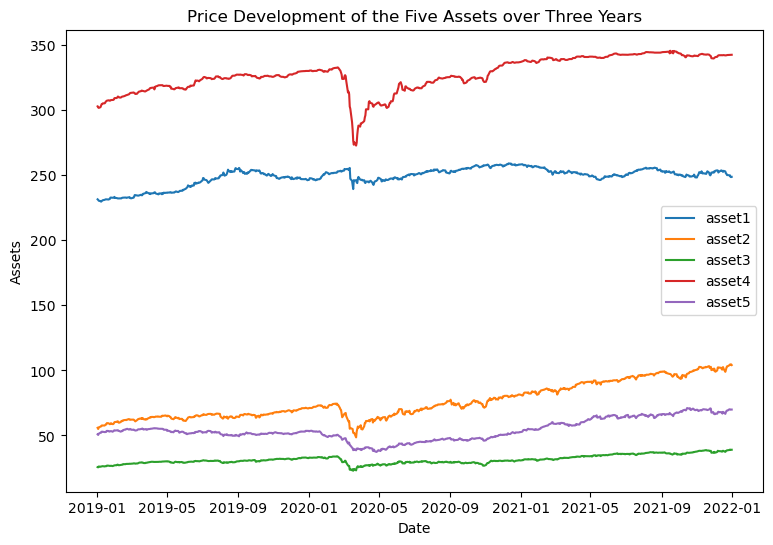

In [45]:
df_asset_price_data_ffill_na['date'] = pd.to_datetime(df_asset_price_data_ffill_na['date'])

plt.figure(figsize=(9,6))

for asset in ["asset1", "asset2", "asset3", "asset4", "asset5"]:
    sns.lineplot(x = "date", y = asset, data = df_asset_price_data_ffill_na, label=asset) 

plt.legend(loc="center right")
plt.xlabel("Date")
plt.ylabel("Assets")
plt.title("Price Development of the Five Assets over Three Years")
plt.show()

***Insights on Time Series Graph***

- The graph shows the different start values of the assets from lower 2-digit (Asset 2, 3 and 5) to lower 3-digit range (Asset 1 and 4).
- All graphs have a higher end value than start value, so overall the performance was positive.
- Asset 2 and Asset 4 seem to have performed better than the other assets.
- All assets show losses around March 2020, when Covid hit the stock and capital markets for the first time.
- Asset 4 shows a greater loss at this point than the other assets.

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

***Comment on visualizations***

I understood the exercise to ask for the following: correlation matrix and scatter plot for the daily percentage returns of the assets (not for the asset prices).

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>

In [50]:
# Inserting column with daily percentage growth for each asset column

# creating a copy to store df with new columns
df_asset_growth_rate = df_asset_price_data_ffill_na.copy()

for asset in ["asset1", "asset2", "asset3", "asset4", "asset5"]:
    new_column_name_1 = f'growth_rate_{asset}'
    df_asset_growth_rate[new_column_name_1] = df_asset_growth_rate[asset].pct_change(periods=1) * 100
    col_index = df_asset_growth_rate.columns.get_loc(asset)  # integrating new column after respective Asset column
    df_asset_growth_rate.insert(col_index + 1, new_column_name_1, df_asset_growth_rate.pop(new_column_name_1))

df_asset_growth_rate

,date,asset1,growth_rate_asset1,asset2,growth_rate_asset2,asset3,growth_rate_asset3,asset4,growth_rate_asset4,asset5,growth_rate_asset5
0,2019-01-02,231.5061,NaN,55.875,NaN,25.649222,NaN,302.93,NaN,50.89,NaN
1,2019-01-03,231.0356,-0.203234,54.977,-1.607159,25.503047,-0.569902,302.11,-0.270690,50.41,-0.943211
2,2019-01-04,230.4026,-0.273984,56.129,2.095422,26.147133,2.525524,301.77,-0.112542,51.38,1.924221
3,2019-01-07,230.0543,-0.151170,56.838,1.263162,25.955277,-0.733753,302.33,0.185572,52.14,1.479175
4,2019-01-08,229.7012,-0.153486,56.895,0.100285,26.137997,0.703977,303.42,0.360533,52.13,-0.019179
...,...,...,...,...,...,...,...,...,...,...,...
778,2021-12-27,249.9207,-0.091306,103.956,0.738415,38.820000,0.543901,342.40,0.000000,70.11,1.344319
779,2021-12-28,249.9368,0.006442,104.526,0.548309,39.115000,0.759918,342.40,0.000000,70.03,-0.114106
780,2021-12-29,248.7215,-0.486243,104.360,-0.158812,38.855000,-0.664707,342.46,0.017523,69.81,-0.314151
781,2021-12-30,248.5485,-0.069556,104.663,0.290341,38.985000,0.334577,342.55,0.026280,69.91,0.143246


In [51]:
# Creating df with only the growth rate of the assets (without the asset prices themselves)
df_growth_rate = df_asset_growth_rate.drop(columns=["asset1", "asset2", "asset3", "asset4", "asset5"])
df_growth_rate

,date,growth_rate_asset1,growth_rate_asset2,growth_rate_asset3,growth_rate_asset4,growth_rate_asset5
0,2019-01-02,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2,2019-01-04,-0.273984,2.095422,2.525524,-0.112542,1.924221
3,2019-01-07,-0.151170,1.263162,-0.733753,0.185572,1.479175
4,2019-01-08,-0.153486,0.100285,0.703977,0.360533,-0.019179
...,...,...,...,...,...,...
778,2021-12-27,-0.091306,0.738415,0.543901,0.000000,1.344319
779,2021-12-28,0.006442,0.548309,0.759918,0.000000,-0.114106
780,2021-12-29,-0.486243,-0.158812,-0.664707,0.017523,-0.314151
781,2021-12-30,-0.069556,0.290341,0.334577,0.026280,0.143246


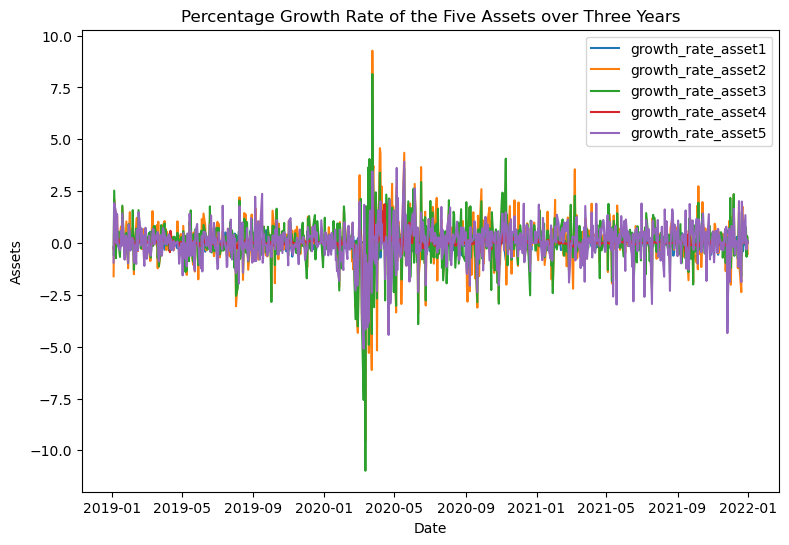

In [52]:
df_growth_rate_date_index = df_growth_rate.copy()

df_growth_rate_date_index['date'] = pd.to_datetime(df_growth_rate_date_index['date'])

df_growth_rate_date_index = df_growth_rate_date_index.set_index("date")

plt.figure(figsize=(9,6))

for asset in df_growth_rate_date_index.columns:
    sns.lineplot(x = "date", y = asset, data = df_growth_rate_date_index, label=asset) 

plt.legend(loc="upper right")
plt.xlabel("Date")
plt.ylabel("Assets")
plt.title("Percentage Growth Rate of the Five Assets over Three Years")
plt.show()

In [53]:
df_growth_rate_date_index.describe().round(2)

,growth_rate_asset1,growth_rate_asset2,growth_rate_asset3,growth_rate_asset4,growth_rate_asset5
count,782.00,782.00,782.00,782.00,782.00
mean,0.01,0.09,0.06,0.02,0.05
std,0.30,1.20,1.17,0.33,0.94
min,-3.25,-9.54,-10.98,-3.41,-5.10
25%,-0.12,-0.34,-0.34,-0.03,-0.36
50%,0.02,0.11,0.09,0.02,0.08
75%,0.15,0.60,0.57,0.09,0.55
max,2.84,9.27,8.14,2.23,3.92


***Insights on Daily Percentage Growth Rate***

- Asset 2 and Asset 3 show a very high daily volatility with minimum growth rate around 9.5-11 % and maximums between 8-9.5 %. Also the std is high for these two assets.
- Even though Asset 4 showed great losses around March 2020 in the time series graph, the daily percentage growth proves to be rather stable, so the losses were made over a longer period of time.
- Asset 1 and Asset 4 shows the lowest daily percentage growth (respectively decrease) rates.
- In the lineplot, one can see that before the crash in March 2020, the growth rates of all assets were in a range of around +- 2.5, March 2020 then shows extreme values first downwards but extremely quickly upwwards again. After this, the growth rates fluctuate more than before.

<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>

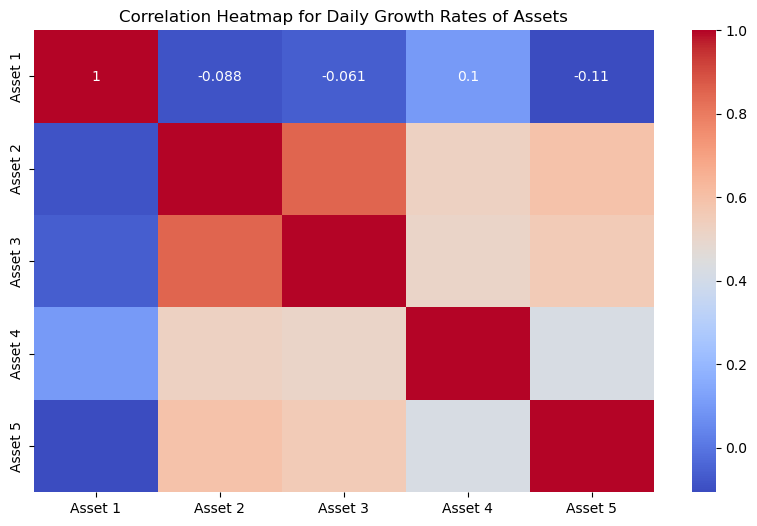

In [56]:
# Correlation matrix on the daily growth rates of the assets
df_growth_rate_correlation = df_growth_rate_date_index.copy()

df_growth_rate_correlation = df_growth_rate_date_index.rename(columns={"growth_rate_asset1": "Asset 1", "growth_rate_asset2": "Asset 2", "growth_rate_asset3": "Asset 3", "growth_rate_asset4": "Asset 4", "growth_rate_asset5": "Asset 5"})

correlation_matrix_growth_rate = df_growth_rate_correlation.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(10, 6))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix_growth_rate, cmap="coolwarm", annot=True)

plt.title("Correlation Heatmap for Daily Growth Rates of Assets")
plt.show()

In [57]:
round(correlation_matrix_growth_rate, 2)

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5
Asset 1,1.00,-0.09,-0.06,0.10,-0.11
Asset 2,-0.09,1.00,0.85,0.53,0.59
Asset 3,-0.06,0.85,1.00,0.51,0.56
Asset 4,0.10,0.53,0.51,1.00,0.42
Asset 5,-0.11,0.59,0.56,0.42,1.00


***Comment on Heatmap***

As mentioned on Slack before, my heatmap doesn't display all the numbers. I have tried many things, upgrading, downgrading and mixing different versions of sns and plt but it doesn't change. I have also read through forums, it shouldn't be a problem anymore but I don't know why it still doesn't here.

Because I cannot display this in a heatmap, I calculated all the Spearman correlation individually (Pearson can be seen in the matrix above).

In [59]:
# Calculation of correlations for Spearman (Pearson can be seen in the matrix)
for i in range(len(df_growth_rate_date_index.columns)):
    for j in range(i + 1, len(df_growth_rate_date_index.columns)):
        asset1 = df_growth_rate_date_index.columns[i]
        asset2 = df_growth_rate_date_index.columns[j]

        spearman_corr = df_growth_rate_date_index[asset1].corr(df_growth_rate_date_index[asset2], method='spearman')
        print(f"Spearman correlation between {asset1} and {asset2}: {spearman_corr:.2f}")

Spearman correlation between growth_rate_asset1 and growth_rate_asset2: -0.12
Spearman correlation between growth_rate_asset1 and growth_rate_asset3: -0.07
Spearman correlation between growth_rate_asset1 and growth_rate_asset4: 0.02
Spearman correlation between growth_rate_asset1 and growth_rate_asset5: -0.18
Spearman correlation between growth_rate_asset2 and growth_rate_asset3: 0.77
Spearman correlation between growth_rate_asset2 and growth_rate_asset4: 0.35
Spearman correlation between growth_rate_asset2 and growth_rate_asset5: 0.46
Spearman correlation between growth_rate_asset3 and growth_rate_asset4: 0.32
Spearman correlation between growth_rate_asset3 and growth_rate_asset5: 0.38
Spearman correlation between growth_rate_asset4 and growth_rate_asset5: 0.24


***Insights on Correlation***
- Only two assets are highly correlated regarding their daily return rates (%):
  - Asset2 and Asset3 with a linear correlation of 0.85 (Pearson) and a monotonic correlation of 0.77 (Spearman).
- Asset1 is noticeable because it has a lower correlation with all the other assets than the other assets with one another.
- Asset2, Asset3, Asset4 and Asset5 all have a medium high linear correlation with each other (apart from the very high correlation between Asset2 and Asset3, see above), the monotonic relationship is weaker in each case.
- Asset2 and Asset3 are of a different investment kind (Fixed Income and Equity), so this would not be a sufficient possible explanation for the correlation.
- At this point the most promising explanatory factor for correlations in general seem to be general influence factors on the financial markets (like a crisis caused by a pandemic which is most likely responsible for the decline in all assets around March 2020).

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>

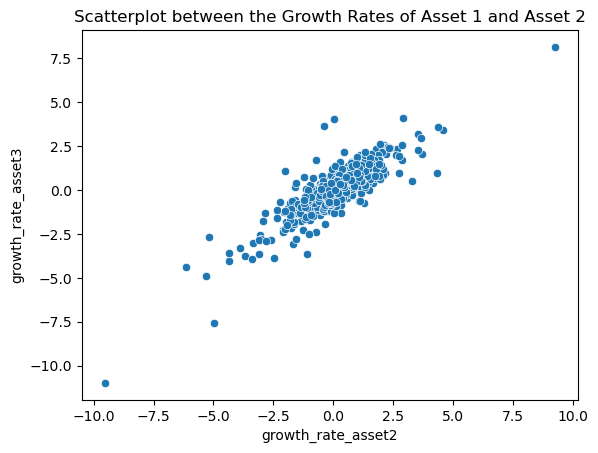

In [62]:
scatterplot_asset2_asset3 = sns.scatterplot(data=df_growth_rate, x='growth_rate_asset2', y='growth_rate_asset3')
plt.title("Scatterplot between the Growth Rates of Asset 1 and Asset 2")
plt.show()

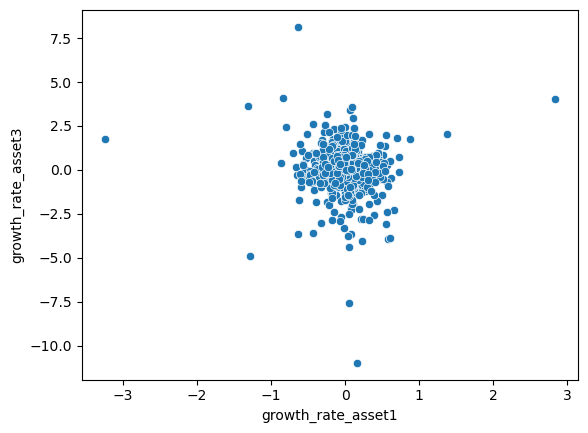

In [63]:
scatterplot_asset1_asset3 = sns.scatterplot(data=df_growth_rate, x='growth_rate_asset1', y='growth_rate_asset3')
plt.show()

***Insights on Scatterplots***

- I chose to display two scatterplots, to see the differences very clearly.
- In scatterplot_asset2_asset3 one can see the strongly linear relationship whereas in scatterplot_asset1_asset3 you can quite contrarily not see any linearity, most of the data points are gathered in an almost circular area.

***Summary: Insights on Daily Percentage Growth Rate***

- The assets differ greatly in their daily percentage growth rate.
- Asset 2 and Asset 3 show a very high daily volatility with minimum growth rate around 9.5-11 % and maximums between 8-9.5 %. Also the std is high for these two assets.
- Asset 1 and Asset 4 shows the lowest daily percentage growth (respectively decrease) rates.
- Even though Asset 4 showed great losses around March 2020 in the time series graph, the daily percentage growth proves to be rather stable, so the losses were made over a longer period of timt 3.
- Asset 2 and 3 show a high correlation (linear and monotonic) regarding their growth rates, which can also be seen in the Scatterplot. They seem to be affected by the same parameters or by one another.
- Most of the others show a medium correlation (linear, the monotonic relationship is weaker in every case).
- Asset 1 stands out for the low correlation it has with all the othe assets


<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h3 style="color: #FF6347;">Data Loading</h3>

In [68]:
df_portfolio_weights.head(2)

,date,asset1_weight,asset2_weight,asset3_weight,asset4_weight,asset5_weight
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974


In [69]:
df_portfolio_weights.shape

(783, 6)

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>

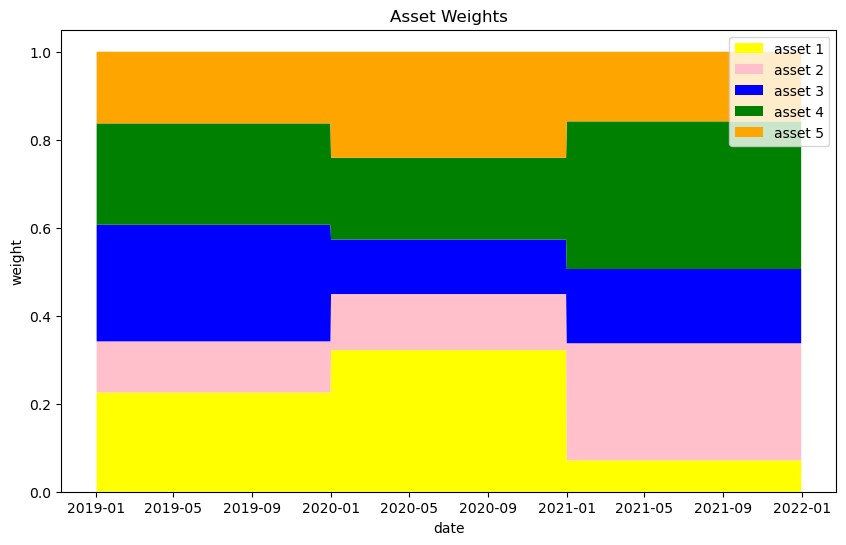

In [71]:
# making sure the date is interpreted correctly
df_portfolio_weights['date'] = pd.to_datetime(df_portfolio_weights['date'])

# define colors to use in chart 
color_map = ['yellow', 'pink', 'blue', 'green', 'orange'] 

# size so that that date is fully shown in the chart
plt.figure(figsize=(10,6))

# create area chart with date as x-axis and assets on y, stacked above one another
plt.stackplot(df_portfolio_weights.date,
              df_portfolio_weights.asset1_weight,
              df_portfolio_weights.asset2_weight,
              df_portfolio_weights.asset3_weight,
              df_portfolio_weights.asset4_weight,
              df_portfolio_weights.asset5_weight,
              labels=['asset 1', 'asset 2', 'asset 3', 'asset 4', 'asset 5'], 
              colors=color_map)

plt.legend(loc="upper right") # adding legend
plt.xlabel("date")
plt.ylabel("weight")
plt.title("Asset Weights")
plt.show()

***Insights on Asset Weights***

- Asset 3 has the highest weight at the start of the portfolio in January 2019, followed by Asset 1, 4, 5 and 2 (decreasing order).
- In the beginning of 2020 (January) this shifted a lot, some assets were sold, some were topped up:
    - Asset 1 and 5 were increased while Asset 3 was heavily decreased.
    - Asset 4 was slightly decreased as well while Asset 2 looks to have stayed the same or was very slightly increased
- There is a second round of seeling/buying within the portfolio at the begining of 2021 (January) with a great shift in asset weights
    - Asset 2 and 4 were heavily increased while Asset 1 was heavily decreased.
    - Asset 3 was slightly increased and Asset 5 was slightly decreased.

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>

In [74]:
df_asset_growth_rate

,date,asset1,growth_rate_asset1,asset2,growth_rate_asset2,asset3,growth_rate_asset3,asset4,growth_rate_asset4,asset5,growth_rate_asset5
0,2019-01-02,231.5061,NaN,55.875,NaN,25.649222,NaN,302.93,NaN,50.89,NaN
1,2019-01-03,231.0356,-0.203234,54.977,-1.607159,25.503047,-0.569902,302.11,-0.270690,50.41,-0.943211
2,2019-01-04,230.4026,-0.273984,56.129,2.095422,26.147133,2.525524,301.77,-0.112542,51.38,1.924221
3,2019-01-07,230.0543,-0.151170,56.838,1.263162,25.955277,-0.733753,302.33,0.185572,52.14,1.479175
4,2019-01-08,229.7012,-0.153486,56.895,0.100285,26.137997,0.703977,303.42,0.360533,52.13,-0.019179
...,...,...,...,...,...,...,...,...,...,...,...
778,2021-12-27,249.9207,-0.091306,103.956,0.738415,38.820000,0.543901,342.40,0.000000,70.11,1.344319
779,2021-12-28,249.9368,0.006442,104.526,0.548309,39.115000,0.759918,342.40,0.000000,70.03,-0.114106
780,2021-12-29,248.7215,-0.486243,104.360,-0.158812,38.855000,-0.664707,342.46,0.017523,69.81,-0.314151
781,2021-12-30,248.5485,-0.069556,104.663,0.290341,38.985000,0.334577,342.55,0.026280,69.91,0.143246


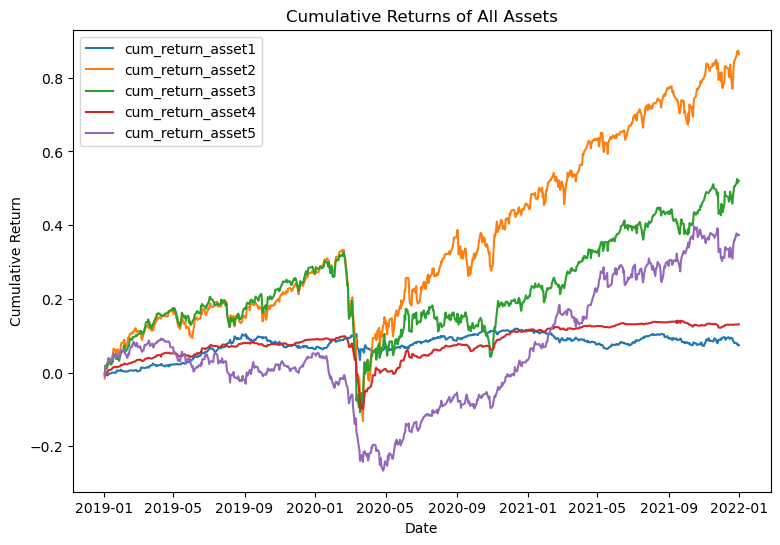

In [75]:
# Calculating cumulative return from percentage growth rate

df_asset_growth_rate[['growth_rate_asset1', 'growth_rate_asset2', 'growth_rate_asset3', 'growth_rate_asset4', 'growth_rate_asset5']] /= 100 # after consulting ChatGPT, I found out that the column had to be in decimal to be able to work with it
df_asset_cumulative_returns = df_asset_growth_rate[['date']].copy()  # New df with one date as base for calculation

df_asset_cumulative_returns['date'] = pd.to_datetime(df_asset_cumulative_returns['date'])

# Loop for all values in growth rate
for asset in ['growth_rate_asset1', 'growth_rate_asset2', 'growth_rate_asset3', 'growth_rate_asset4', 'growth_rate_asset5']:
    new_column_name = f'cum_{asset.replace("growth_rate_", "return_")}' # renaming columns
    df_asset_cumulative_returns[new_column_name] = (1 + df_asset_growth_rate[asset]).cumprod() - 1 # Calculating cumulative return

# Plotting cumulative return of all assets as lineplots
plt.figure(figsize=(9, 6))
for asset in ['cum_return_asset1', 'cum_return_asset2', 'cum_return_asset3',
              'cum_return_asset4', 'cum_return_asset5']:
    sns.lineplot(data=df_asset_cumulative_returns, x='date', y=asset, label=asset)
    
plt.title("Cumulative Returns of All Assets")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

In [76]:
df_asset_cumulative_returns

,date,cum_return_asset1,cum_return_asset2,cum_return_asset3,cum_return_asset4,cum_return_asset5
0,2019-01-02,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2,2019-01-04,-0.004767,0.004546,0.019412,-0.003829,0.009629
3,2019-01-07,-0.006271,0.017235,0.011932,-0.001981,0.024563
4,2019-01-08,-0.007796,0.018255,0.019056,0.001618,0.024366
...,...,...,...,...,...,...
778,2021-12-27,0.079543,0.860510,0.513496,0.130294,0.377677
779,2021-12-28,0.079612,0.870711,0.524997,0.130294,0.376105
780,2021-12-29,0.074363,0.867740,0.514861,0.130492,0.371782
781,2021-12-30,0.073615,0.873163,0.519929,0.130789,0.373747


***Inisights on Historical Cumulative Return***

- The lineplot shows the partly very different performances of the assets regarding their cumulative returns.
- There seem to be some similarities between Asset 2 and Asset 3 (which could also be seen in the correlation analysis):
    - Especially until the losses in March 2020, they seem to perform almost identical.
    - After March 2020 though, Asset 2 shows a faster and stronger recovery and a higher cumulative return.
- But Asset 2 and 3 (as does Asset 5) recover quickly after the "crash" and then increase strongly, whereas Asset 1 and 4 go back to almost the same performance than before March 2020.  
- Asset 5 shows a negative return in the beginning, krass losses in March 2020 and then a fast and strong recovery with an increasingly high cumulative return
- Asset 1 is again worth mentioning as it shows very few movements in either direction. The cumulative return more or less stays the same over the period of three years (and is only slightly positive).

<h2 style="color: #FF6347;">Annualized Return.</h2>

In [79]:
df_asset_annualized_returns = df_growth_rate_date_index.copy()

In [80]:
df_asset_annualized_returns.head(2)

,growth_rate_asset1,growth_rate_asset2,growth_rate_asset3,growth_rate_asset4,growth_rate_asset5
date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.203234,-1.607159,-0.569902,-0.27069,-0.943211


In [81]:
df_asset_annualized_returns

,growth_rate_asset1,growth_rate_asset2,growth_rate_asset3,growth_rate_asset4,growth_rate_asset5
date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2019-01-04,-0.273984,2.095422,2.525524,-0.112542,1.924221
2019-01-07,-0.151170,1.263162,-0.733753,0.185572,1.479175
2019-01-08,-0.153486,0.100285,0.703977,0.360533,-0.019179
...,...,...,...,...,...
2021-12-27,-0.091306,0.738415,0.543901,0.000000,1.344319
2021-12-28,0.006442,0.548309,0.759918,0.000000,-0.114106
2021-12-29,-0.486243,-0.158812,-0.664707,0.017523,-0.314151


In [82]:
df_asset_annualized_returns.isna().sum()

growth_rate_asset1    1
growth_rate_asset2    1
growth_rate_asset3    1
growth_rate_asset4    1
growth_rate_asset5    1
dtype: int64

In [83]:
# filling NaNs with 0.0 because there was no growth (start point) but the valid value is important for the annualized return calculation
df_asset_annualized_returns.fillna(0.0, inplace=True)

In [84]:
df_asset_annualized_returns.isna().sum()

growth_rate_asset1    0
growth_rate_asset2    0
growth_rate_asset3    0
growth_rate_asset4    0
growth_rate_asset5    0
dtype: int64

In [85]:
df_asset_annualized_returns.describe().round(2)

,growth_rate_asset1,growth_rate_asset2,growth_rate_asset3,growth_rate_asset4,growth_rate_asset5
count,783.00,783.00,783.00,783.00,783.00
mean,0.01,0.09,0.06,0.02,0.05
std,0.30,1.20,1.17,0.33,0.94
min,-3.25,-9.54,-10.98,-3.41,-5.10
25%,-0.12,-0.34,-0.34,-0.03,-0.36
50%,0.02,0.11,0.09,0.02,0.08
75%,0.15,0.60,0.57,0.09,0.55
max,2.84,9.27,8.14,2.23,3.92


In [86]:
# annualized rate

# dictionary for results, trading days as stated in exercise (no of rows / 3)
annualized_returns = {}
trading_days = 261 

for asset in df_asset_annualized_returns.columns:
    decimal_returns = df_asset_annualized_returns[asset] / 100 # convert numbers to decimal
    
    daily_growth_factor = (1 + decimal_returns).mean()
    
    # Projecting the (daily) mean to a year no of yearly trading days)
    annualized_return = daily_growth_factor ** trading_days - 1
    
    annualized_returns[asset] = annualized_return

df_annualized_returns = pd.DataFrame(list(annualized_returns.items()), columns=['Asset', 'Annualized Return'])
df_annualized_returns

,Asset,Annualized Return
0,growth_rate_asset1,0.025437
1,growth_rate_asset2,0.253914
2,growth_rate_asset3,0.170763
3,growth_rate_asset4,0.043371
4,growth_rate_asset5,0.124670


***Insights on Annualized Returns***

- The annualized returns differ greatly between the assets:
    - Asset 2 and 3 again show the best performances, especially Asset 2 with an annualized return of 25.39% (Asset 3: 17.08%)
    - Asset 1 is the lowest performer (as also the analysis before pointed to) with an annualized return of 2.54%.
    - Asset 4 also shows a relatively low annualized return of 4.34%
    - Asset 5 is in the middle with 12.47%

<h2 style="color: #FF6347;">Annualized Volatility.</h2>

In [89]:
# cops of the df with growth rates
df_asset_annualized_volatility = df_growth_rate_date_index.copy()

In [90]:
# Dictionary to store volatility
annualized_volatility = {}
trading_days = 261

# Iterate over each column (daily volatility = daily std)
for asset in df_asset_annualized_volatility.columns:
    daily_volatility = df_asset_annualized_volatility[asset].std() / 100  # convert to decimal
    
    # annualized volatility
    annualized_vol = daily_volatility * np.sqrt(trading_days)
    
    annualized_volatility[asset] = annualized_vol

df_asset_annualized_volatility = pd.DataFrame(list(annualized_volatility.items()), columns=['Asset', 'Annualized Volatility'])
df_asset_annualized_volatility

,Asset,Annualized Volatility
0,growth_rate_asset1,0.048304
1,growth_rate_asset2,0.193938
2,growth_rate_asset3,0.188591
3,growth_rate_asset4,0.053642
4,growth_rate_asset5,0.152430


***Comment on annualized volatility***

I do not understand the formulas 100% (this line: "annualized_vol = daily_volatility * np.sqrt(trading_days)"), I found this by researching a way to calculate the annualized volatility.

***Insights on Annualized Volatility***

- The annualized volatility als differs greatly between the assets:
    - Asset 2 and 3 show the highest annualized volatilities with 19.39 and 18.86%.
    - Asset 1 and 4 shows the lowest volatility with 4.83 and 5.36%.
    - Asset 5 again is in the middle with 15.24%.

<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>

- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

In [95]:
df_asset_information_data

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


In [96]:
df_portfolio_weights

,date,asset1_weight,asset2_weight,asset3_weight,asset4_weight,asset5_weight
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974
...,...,...,...,...,...,...
778,2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356
779,2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356
780,2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356
781,2021-12-30,0.071307,0.266093,0.168775,0.33547,0.158356


In [97]:
# Comment: I gathered this code with a lot of help by ChatGPT, I understand everything but I couldn't come up with this from scratch

# converting date column and setting it as index
df_portfolio_weights['date'] = pd.to_datetime(df_portfolio_weights['date'])
df_portfolio_weights.set_index('date', inplace=True)

# new df for weights by type (filling with the loop), date as index
df_portfolio_weights_by_type = pd.DataFrame(index=df_portfolio_weights.index)

# Assigning asset types
asset_types = {
    'asset1_weight': 'Fixed Income',
    'asset2_weight': 'Fixed Income',
    'asset3_weight': 'Equity',
    'asset4_weight': 'Equity',
    'asset5_weight': 'Alternative'
}

# Sum of all weights by type
for asset_type in set(asset_types.values()):
    # lists for assets of the same type
    assets_in_type = [asset for asset, atype in asset_types.items() if atype == asset_type]
    # sum of weights of assets of the same type
    df_portfolio_weights_by_type[asset_type] = df_portfolio_weights[assets_in_type].sum(axis=1)

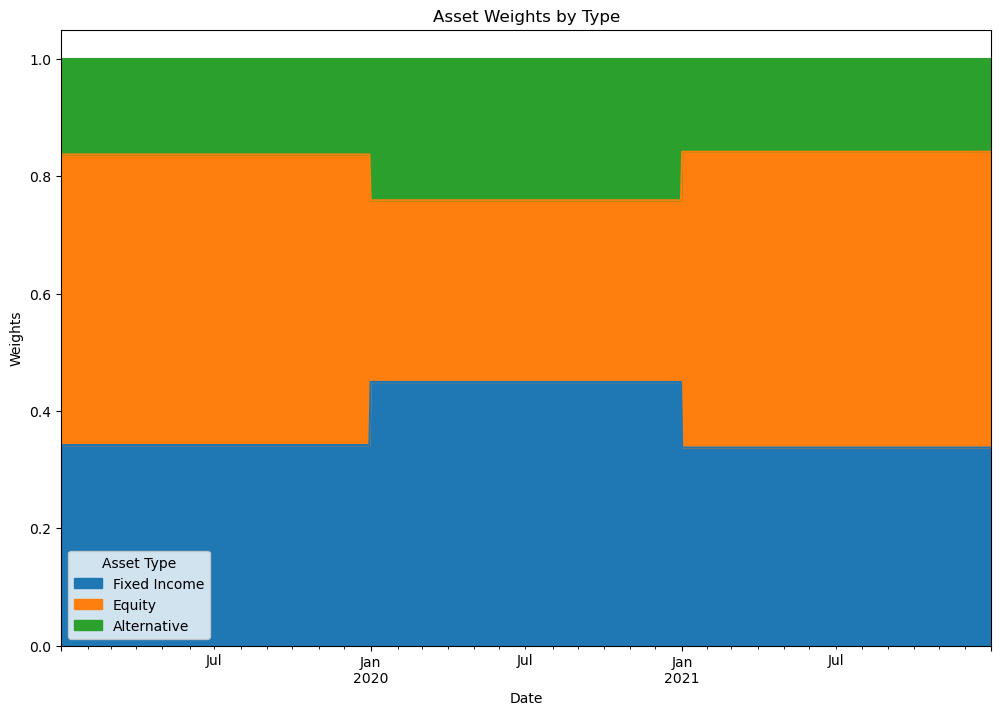

In [98]:
# creating area chart 
df_portfolio_weights_by_type.plot(kind='area', stacked=True, figsize=(12, 8))
plt.title("Asset Weights by Type")
plt.xlabel("Date")
plt.ylabel("Weights")
plt.legend(title="Asset Type")
plt.show()

***Insights on Asset Weights by Investment Type***

- Assets of the type "Equity" (Asset 3 and 4) were decreased in 2020 and then increased again to the level of 2019 in 2021
- Assets of the type "Fixed Income" (Asset 1 and 2) and "Alternative" (Asset 5) were the mirror of this: increased in 2020 and then decreased again to the level of 2019 in 2021

***Short Summary***

- For investers with strong nerves and risk affinity, Assets 2 and 3 seem to be the right option:
    - They promise big profits.
    - But they also show a high volatility.
- Asset 1 and 4 are very stable but the returns could be even lower than the inflation, so investers should be careful here as well.
- Asset 5 could be an alternative investment as it generated good profits in the past but also a smaller tendency towards fluctuation (than Asset 2 or 3).
- Asset 2 and 3 are highly correlated and they also show similar growth rates, annualized and cumulative returns and volatilities.
- The type of the investments seems to be no explanatory factor for the performance, similarities and differences are not in-line with the type.
- At the beginning of each year great changes were made to this portfolio regarding the weighting of the five different assets.